In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize Spark session
spark = SparkSession.builder.appName("CreditAnalysis").getOrCreate()

# Load data into a PySpark DataFrame
credit_df_spark = spark.read.csv('BankChurners.csv', header=True, inferSchema=True)


In [3]:
print(f"DataFrame shape after dropping rows with unknown values: {credit_df_spark.count()}, {len(credit_df_spark.columns)}")

DataFrame shape after dropping rows with unknown values: 10127, 23


In [4]:
credit_df_spark = credit_df_spark.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
credit_df_spark = credit_df_spark.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')
credit_df_spark = credit_df_spark.drop('CLIENTNUM')

In [5]:
# Perform similar unknown value analysis
unknown_counts = {
    'Income_Category': credit_df_spark.filter(col('Income_Category') == 'Unknown').count(),
    'Marital_Status': credit_df_spark.filter(col('Marital_Status') == 'Unknown').count(),
    'Education_Level': credit_df_spark.filter(col('Education_Level') == 'Unknown').count()
}

In [6]:
# Print unknown counts
print(f"Income_category with Unknown status = {unknown_counts['Income_Category']}, \
      Marital_Status with Unknown status = {unknown_counts['Marital_Status']}, \
      Education Level with Unknown status = {unknown_counts['Education_Level']}")


Income_category with Unknown status = 1112,       Marital_Status with Unknown status = 749,       Education Level with Unknown status = 1519


In [7]:
credit_df_spark = credit_df_spark.filter(col('Income_Category') != 'Unknown')
credit_df_spark = credit_df_spark.filter(col('Marital_Status') != 'Unknown')
credit_df_spark = credit_df_spark.filter(col('Education_Level') != 'Unknown')

In [8]:
print(f"DataFrame shape after dropping rows with unknown values: {credit_df_spark.count()}, {len(credit_df_spark.columns)}")

DataFrame shape after dropping rows with unknown values: 7081, 20


In [9]:
credit_df_spark.head()

Row(Attrition_Flag='Existing Customer', Customer_Age=45, Gender='M', Dependent_count=3, Education_Level='High School', Marital_Status='Married', Income_Category='$60K - $80K', Card_Category='Blue', Months_on_book=39, Total_Relationship_Count=5, Months_Inactive_12_mon=1, Contacts_Count_12_mon=3, Credit_Limit=12691.0, Total_Revolving_Bal=777, Avg_Open_To_Buy=11914.0, Total_Amt_Chng_Q4_Q1=1.335, Total_Trans_Amt=1144, Total_Trans_Ct=42, Total_Ct_Chng_Q4_Q1=1.625, Avg_Utilization_Ratio=0.061)

#### Visualization

In [10]:
credit_df = credit_df_spark.toPandas()

In [11]:
credit_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

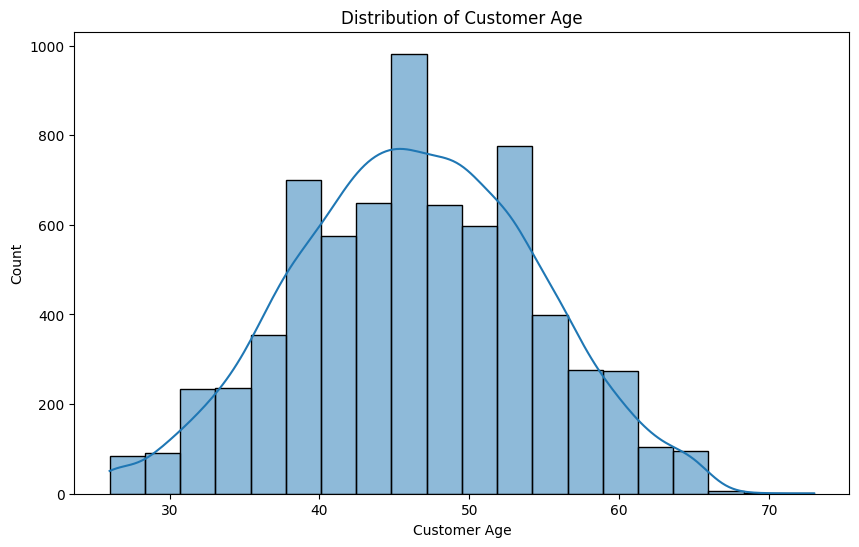

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

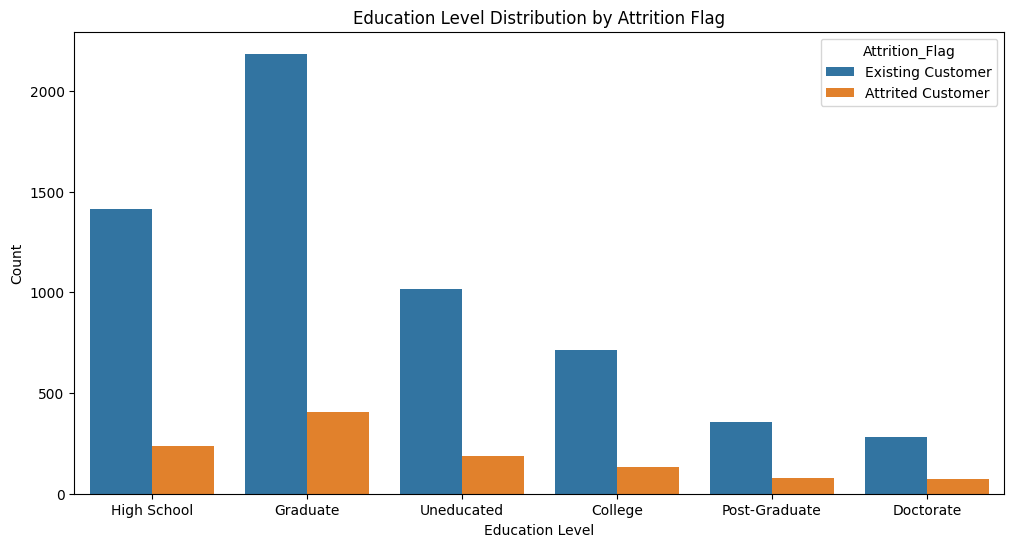

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education_Level', data=credit_df, hue='Attrition_Flag')
plt.title('Education Level Distribution by Attrition Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

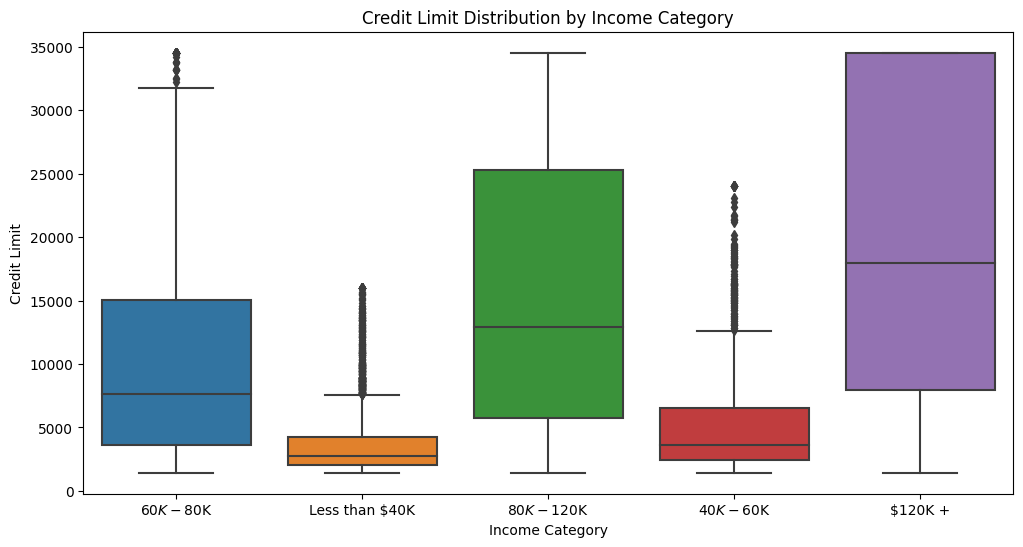

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=credit_df)
plt.title('Credit Limit Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Credit Limit')
plt.show()

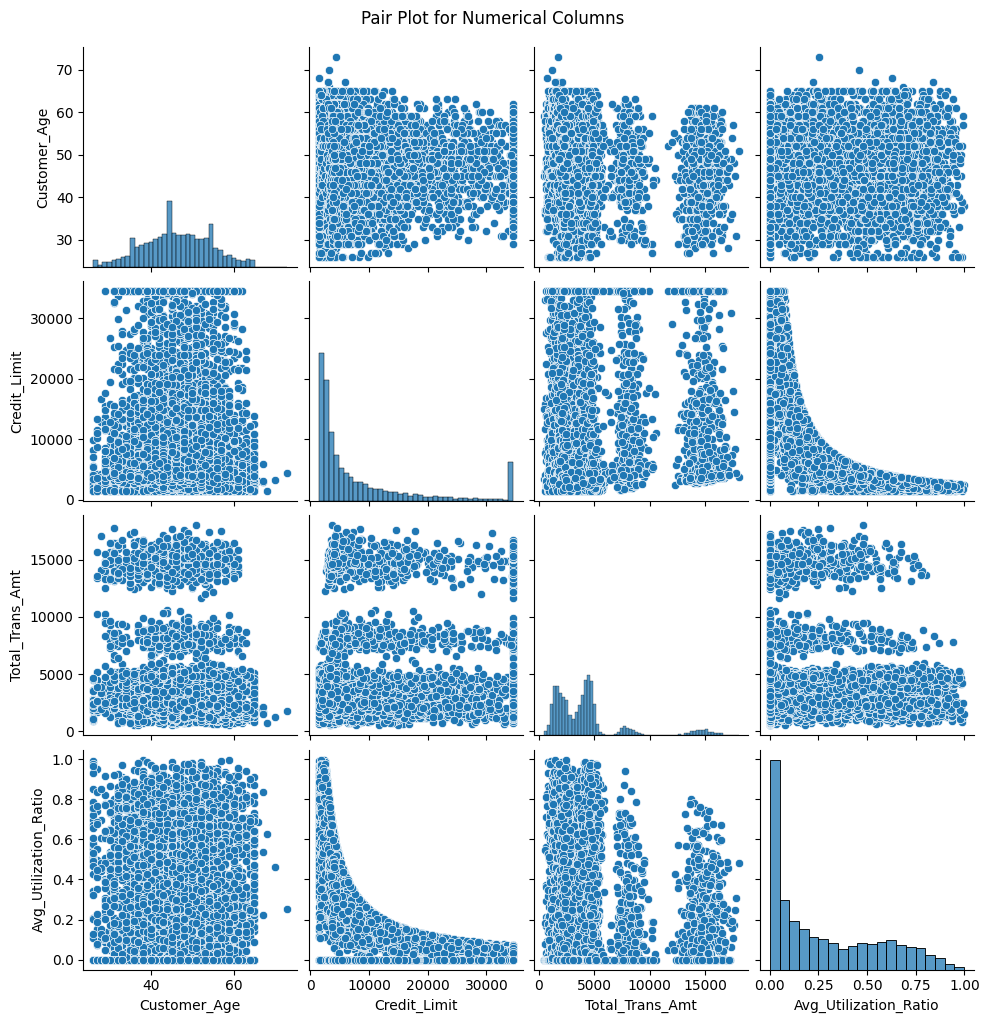

In [15]:
sns.pairplot(credit_df[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']])
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

C:\Users\vasuv\AppData\Local\Temp\ipykernel_16060\1766586374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = credit_df.corr()


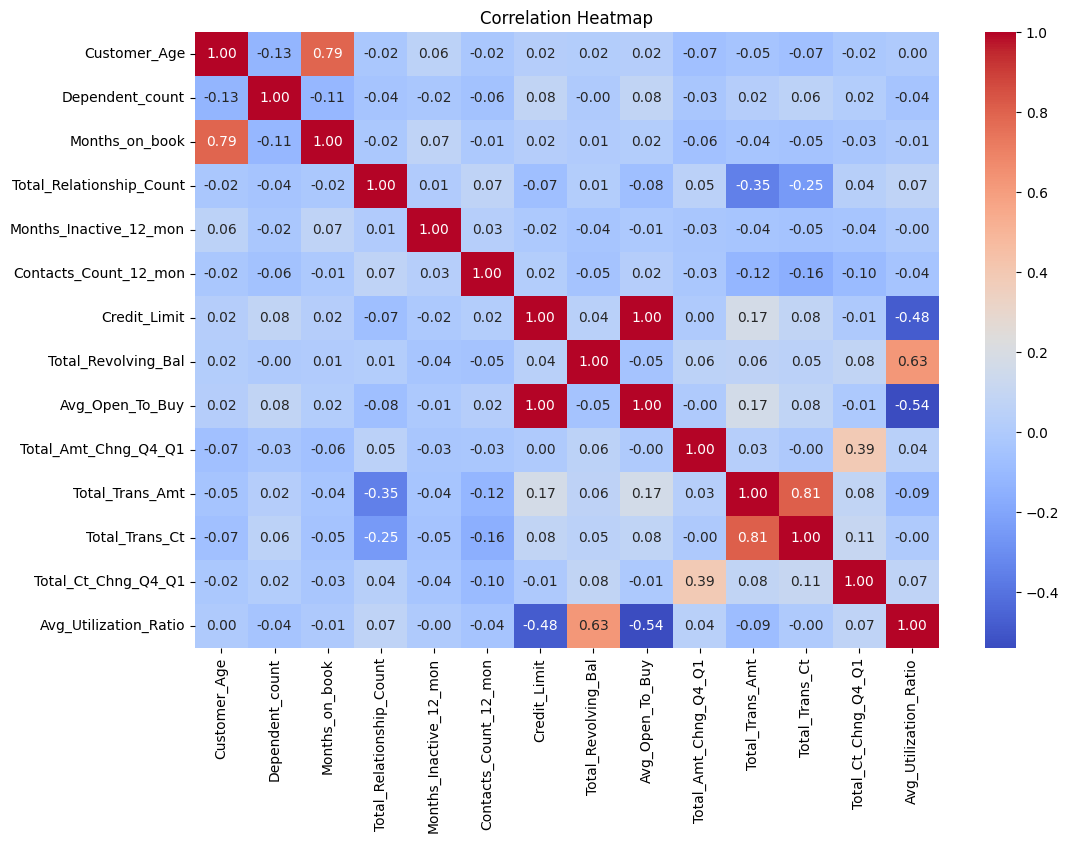

In [16]:
correlation_matrix = credit_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
credit_df.to_csv('Cleaned_Data.csv')